In [2]:
import krp_sp as k
import sentencepiece as spm
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import networkx as nx
import pandas as pd
import codecs
from collections import Counter
from collections import defaultdict
from operator import itemgetter
import numpy as np
# load the log values : , log=True
#ms, md, mv = k.loadmodels(flag="m2",  use_krp_names=False)
#len(md)

In [3]:

def report(flag, up=40, lo=10, w=None, cutoff=10, krp=False):
    ms, md, mv = k.loadmodels(flag=flag, use_krp_names=False)
    if krp:
        m="m0-krp-30000.model"
        ms, md, mv = add_model(m, ms, md, mv, use_krp_names=False)    
    vx = k.agg_voclist(mv, md, w=w)
    v2 = k.red_voclist(vx, up=up, lo=lo)
    sx = k.vocmatrix(v2, size=len(md), vsize=len(mv[0]), w=w)
    res = k.evalvocmatrix(sx, ms, cutoff=cutoff)
    return res

In [4]:
def make_res(ms, md, mv, up=40, lo=10, w=None, cutoff=10):
    vx = k.agg_voclist(mv, md, w=w)
    v2 = k.red_voclist(vx, up=up, lo=lo)
    sx = k.vocmatrix(v2, size=len(md), vsize=len(mv[0]), w=w)
    res = k.evalvocmatrix(sx, ms, cutoff=cutoff)
    return res    

In [5]:
def add_model(m, ms, md, mv, use_krp_names=True):
    mdir = "model"
    sp = spm.SentencePieceProcessor()
    vl = k.loadvoc(m)
    mv.append(vl)
    sp.load("%s/%s" % (mdir, m))
    md.append(sp)
    if use_krp_names:
        ms.append(krp_names[m.split("-")[1]])
    else:
        ms.append(m.split("-")[1])
    return (ms, md, mv)


In [6]:
flag="m5"
ms, md, mv = k.loadmodels(flag=flag, use_krp_names=False)
vx = k.agg_voclist(mv, md)

flag="m2"
ms, md, mv = k.loadmodels(flag=flag,  use_krp_names=False)
m="m0-krp-30000.model"
ms, md, mv = add_model(m, ms, md, mv, use_krp_names=False)

In [7]:
flags=["m2", "m5"]
labels={"m2" : "30000", "m5" : "20000", 
        "None" : "Count", "score" : "Comb.prop", "pos" : "Position"}
limits=[(70,35), (30, 5), (3,1)]
weights=[None, 'score', 'pos']
of=codecs.open("report1.txt", "w", "utf-8")
reps=[]
cnt=0
for flag in flags:
    for up, lo in limits:
        for w in weights:
            res=report(flag, up, lo, w)
            if w is None:
                w="None"
            flx=(flag, up, lo, w)
            print(flx)
            ofh=codecs.open("rep/%s-%3.3d-%3.3d-%s.html" % flx, "w", "utf-8")
            ofh.write("""<html><body><h1>Result for calculation %d</h1>
            <p>Parameters: Vocab.size:%s, limits: %d,%d, Combination: %s</p>
            <table>\n""" % (cnt, labels[flag], up, lo, labels[w]))
            ofh.write("<tr><th>部類</th><th>Self/Other</th><th>Most related部類</th></tr>")
            reps.append((flx, res))
            cnt += 1
            if w is None:
                info = "flag:%s,up:%d,lo:%d,score:None" % (flag, up, lo)
            else:
                info = "flag:%s,up:%d,lo:%d,score:%s" % (flag, up, lo, w)
            of.write("====\n%s\n\n" % (info))    
            kr=list(res.keys())
            kr.sort()
            bu=defaultdict(list)
            bldict={}
            for r in kr:
                s = r[0:3]
                c = Counter([a[0][0:3] for a in res[r]])
                other = sum([a[1] for a in c.items() if a[0] != s])
                bu[s].append((c[s], other))
                bldict[r] = "%2.2d / %2.2d" % (c[s], other)
            for r in kr:
                # should integrate the following table here!
                rx=["%s:%s" % (a[0], k.krp_names[a[0]]) for a in res[r]]
                #ofh.write("%s\t%s\t%s\t%s\n" % (r, k.krp_names[r], bldict[r], ",".join(rx[0:5])))
                ofh.write("<tr><td>%s %s</td><td>%s</td><td>%s</td></tr>\n" % (r, k.krp_names[r], bldict[r], ",".join(rx[0:5])))
            #of.write("\n==Self/other\n")
            ofh.write("</table></body></html>")
            ofh.close()
            of.write("\n==s/o, bu\n")
            bs=list(bu.keys())
            bs.sort()
            for b in bs:
                of.write("%s\t%d\t%d\t%s\n" % (b, sum([a[0] for a in bu[b]]), sum([a[1] for a in bu[b]]), info))
of.close()

('m2', 70, 35, 'None')
('m2', 70, 35, 'score')
('m2', 70, 35, 'pos')
('m2', 30, 5, 'None')
('m2', 30, 5, 'score')
('m2', 30, 5, 'pos')
('m2', 3, 1, 'None')
('m2', 3, 1, 'score')
('m2', 3, 1, 'pos')
('m5', 70, 35, 'None')
('m5', 70, 35, 'score')
('m5', 70, 35, 'pos')
('m5', 30, 5, 'None')
('m5', 30, 5, 'score')
('m5', 30, 5, 'pos')
('m5', 3, 1, 'None')
('m5', 3, 1, 'score')
('m5', 3, 1, 'pos')


In [ ]:
G.degree()

In [ ]:
from operator import itemgetter
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

In [ ]:
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
hub_ego = nx.ego_graph(G, largest_hub)
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=10, with_labels=True)
    # Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=600, node_color='r')
#plt.show()

In [ ]:
hub_ego

In [ ]:
for i in nx.connected_component_subgraphs(G):
    dir(i)

In [ ]:
nx.write_gexf(G, "test.gexf")

In [ ]:
sx = k.vocmatrix(v2, size=75, w=w)

In [ ]:
ms

Prepare the dictionary that holds the calculation results

In [8]:
bud=defaultdict(lambda: defaultdict(list))
#bus=defaultdict(list)
for fl, res in reps:
    key="%s-%3.3d-%3.3d-%s.html" % fl
    #key = "%d/%d:%s" % fl[1:]
    k1 = fl[0]
    rk=list(res.keys())
    rk.sort()
    bu=defaultdict(list)
    for r in rk:
        s = r[0:3]
        c = Counter([a[0][0:3] for a in res[r]])
        other = sum([a[1] for a in c.items()]) - c[s]
        bu[s].append((c[s], other))
    bs=list(bu.keys())
    bs.sort()
    for b in bs:
        bud[b][k1].append((key, sum([a[0] for a in bu[b]]), 
                                 sum([a[1] for a in bu[b]])))
        #bus[b].append((key, sum([a[0] for a in bu[b]]), sum([a[1] for a in bu[b]])))
    
    #print (rk)

Print the calculation results to a table. 

In [18]:
bcnt= Counter([a[0:3] for a in ms if len(a) == 4])
ofh=codecs.open("rep/sp-self-other-results.html", "w", "utf-8")
ofh.write("<html><body>")
ofh.write("<h1>Sentencepiece calculation results</h1>")
ofh.write("<p>Self(=same 部) / Other (=other 部) results for different values of the upper and lower limits (上下) and vocabulary size (3万, 2万).</p>")
ofh.write("<p>For all subcategories 部類 in a category 部, for the 10 most similar subcategories, a same/other calculation is performed, the maximal score is thus 10 times the number of the subcategories for a given category.</p>")
th2 = "<th>3万</th><th>2万</th>"
bk=list(bud.keys())
bk.sort()
for bx in bk:
    ofh.write("<h2>%s %s (%d部類)</h2>" % (bx, k.krp_names[bx], bcnt[bx]))
    flags = list(bud[bx].keys())
    flags.sort()
    ofh.write("<table border='1'><caption>Results for %s</caption>" % bx )
    ofh.write("<tr><th>Limit</th><th colspan='2'>Count</th><th colspan='2'>Prob.</th><th colspan='2'>Pos</th></tr>")
    ofh.write("<tr><th>上下</th>%s%s%s</tr>" % (th2, th2, th2))
    rp1 = bud[bx][flags[0]]
    rp2 = bud[bx][flags[1]]
    ofh.write ("<tr>")
    for i, p in enumerate(rp1):
        if (i % 3 == 0):
            ss=tuple(map(int, p[0].split('-')[1:3]))
            ofh.write("</tr><tr><td>%d/%d</td>" % (ss))
        ofh.write ("<td><a href='%s'>%d/%d</a></td>\n" % p)
        ofh.write ("<td><a href='%s'>%d/%d</a></td>\n" % rp2[i])
    ofh.write ("</tr>")
    ofh.write("</table>")
ofh.write("</body></html>")
ofh.close()


# Network, community detection

In [23]:
res=reps[4][1]
o=[]
G = nx.Graph()
for r in res:
    for s in res[r]:
        o.append((r, s[0], s[1]))
G.add_weighted_edges_from(o)

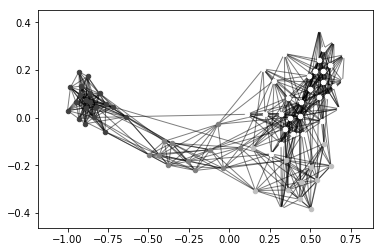

In [24]:
import community
partition = community.best_partition(G)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [25]:
partition = community.best_partition(G)
plist = defaultdict(list)
[plist[a[1]].append(a[0]) for a in partition.items()]
for pl in plist:
    pll=plist[pl]
    pll.sort()
    print (pl, len(pll), ",".join(pll))

0 20 KR6a,KR6b,KR6c,KR6d,KR6e,KR6f,KR6g,KR6h,KR6i,KR6j,KR6k,KR6l,KR6m,KR6n,KR6o,KR6p,KR6q,KR6r,KR6s,KR6v
1 11 KR3e,KR3g,KR5a,KR5b,KR5c,KR5d,KR5e,KR5f,KR5g,KR5h,KR5i
2 33 KR1j,KR2a,KR2b,KR2c,KR2d,KR2e,KR2f,KR2g,KR2h,KR2i,KR2j,KR2k,KR2l,KR2m,KR2n,KR2o,KR3b,KR3c,KR3d,KR3h,KR3i,KR3j,KR3k,KR3l,KR4a,KR4b,KR4c,KR4d,KR4e,KR4f,KR4h,KR4i,KR4j
3 11 KR1a,KR1b,KR1c,KR1d,KR1e,KR1f,KR1g,KR1h,KR1i,KR3a,KR3f


In [26]:
for g in G.nodes:
    G.nodes[g]['label']=k.krp_names[g]

In [27]:
nx.write_gexf(G, "test.gexf")

# Vocab size histogram

In [ ]:
vsize = 20000
labels, values = zip(*Counter([len(a[1]) for a in vx.items()]).items())
cut=5
plt.title("SP Histogram, Vocab.Size=%d" % (vsize))
plt.ylabel("Count")
plt.xlabel("No of entries")
indexes = np.arange(cut, len(labels))
plt.bar(indexes, values[cut:], width)
plt.savefig("vsize-hist-%d.png" % (vsize))
plt.show()
